In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [5]:
spectra_filename = "/Users/robertseaton/School/github_repos/rbcodes/test/data/throwaway1.fits"
spectra = fits.open(spectra_filename)
fits.info(spectra_filename)

Filename: /Users/robertseaton/School/github_repos/rbcodes/test/data/throwaway1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  FLUX          1 PrimaryHDU      10   (2000,)   float32   
  1  ERROR         1 ImageHDU         7   (2000,)   float32   
  2  WAVELENGTH    1 ImageHDU         7   (2000,)   float64   


In [6]:
# FLUX, ERROR, WAVE
fhdr, fdata = spectra[0].header, spectra[0].data
ehdr, edata = spectra[1].header, spectra[1].data
whdr, wdata = spectra[2].header, spectra[2].data

print("-"*80)
print("flux header: ")
for key in fhdr:
    print("  ", key, "::::", fhdr[key])
print("flux data len: ", len(fdata))
print("flux data: ", fdata)
print("-"*80)
print("error header: ")
for key in ehdr:
    print("  ", key, "::::", ehdr[key])
print("error data len: ", len(edata))
print("error data: ", edata)
print("-"*80)
print("wave header: ")
for key in whdr:
    print("  ", key, "::::", whdr[key])
print("wave data len: ", len(wdata))
print("wave data: ", wdata)


--------------------------------------------------------------------------------
flux header: 
   SIMPLE :::: True
   BITPIX :::: -32
   NAXIS :::: 1
   NAXIS1 :::: 2000
   EXTEND :::: True
   EXTNAME :::: FLUX
   METADATA :::: {"headers": ["none"], "airvac": "vac"}
   NSPEC :::: 1
   NPIX :::: 2000
   UNITS :::: {"wave": "Angstrom", "flux": "dimensionless_unit"}
flux data len:  2000
flux data:  [ 0.0031075  -0.00333107 -0.00036649 ...  0.07637463  0.07073068
  0.06790049]
--------------------------------------------------------------------------------
error header: 
   XTENSION :::: IMAGE
   BITPIX :::: -32
   NAXIS :::: 1
   NAXIS1 :::: 2000
   PCOUNT :::: 0
   GCOUNT :::: 1
   EXTNAME :::: ERROR
error data len:  2000
error data:  [0.0589418  0.03720191 0.04235839 ... 0.20304553 0.19546539 0.19101785]
--------------------------------------------------------------------------------
wave header: 
   XTENSION :::: IMAGE
   BITPIX :::: -64
   NAXIS :::: 1
   NAXIS1 :::: 2000
   PCOUNT ::

In [7]:
fdata[fdata < 0] = 0
fmin = np.min(fdata)
fmax = np.max(fdata)
print(f"fdata min: {fmin}")
print(f"fdata max: {fmax}")

wmin1 = np.min(wdata)
wmax1 = np.max(wdata)
print(f"wdata1 min: {wmin1}")
print(f"wdata1 max: {wmax1}")

ustr = fhdr["UNITS"]
print(f"units: {ustr}")
print("units type: ", type(ustr))
print("units length: ", len(ustr))
udict = json.loads(ustr)
wunits = udict["wave"]
funits = udict["flux"]
print(f"wave units: {wunits}")
print(f"flux units: {funits}")
wrange = wmax1 - wmin1
frange = fmax - fmin

wdata2 = []
for w in wdata:
    wdata2.append(w + 200)
wmin2 = np.min(wdata2)
wmax2 = np.max(wdata2)

wmin = np.min([wmin1, wmin2])
wmax = np.max([wmax1, wmax2])
wrange = wmax - wmin



fdata min: 0.0
fdata max: 1.584504246711731
wdata1 min: 3502.0016762369
wdata1 max: 5501.5281080123195
units: {"wave": "Angstrom", "flux": "dimensionless_unit"}
units type:  <class 'str'>
units length:  50
wave units: Angstrom
flux units: dimensionless_unit


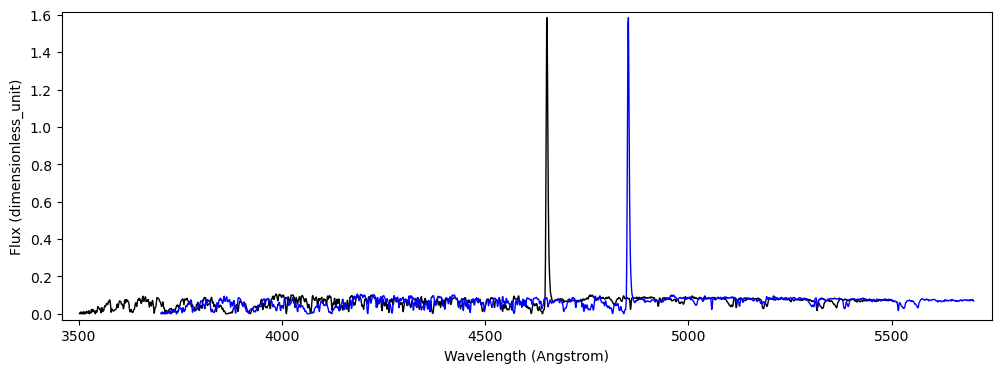

In [8]:
f=plt.figure(figsize=[12,4])
plt.plot(wdata,fdata, color='black', linewidth=1.0)
plt.plot(wdata2,fdata, color='blue', linewidth=1.0)
factor = 0.02
wfac = factor * wrange
ffac = factor * frange
plt.axis([wmin-wfac,wmax+wfac,fmin-ffac,fmax+ffac])

plt.xlabel(f'Wavelength ({wunits})')
plt.ylabel(f'Flux ({funits})')
plt.show()